# Homework 5 Duvall Pinkney 2/20/2021

We will also use the FBI NICS Firearms Background Check data from Labs 2 and 5.

Remember all plots should have informative axis labels and a title.

### Question 0: Loading the data

As in Lab 5, load the data and convert the `month` column into DateTime objects.

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [71]:
data = pd.read_csv("nics-firearm-background-checks.csv")
data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-01,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,1568,0.0,26.0,11.0,2.0,2820.0,1301.0,5.0,26.0,0.0,0.0,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602
1,2021-01,Alaska,283.0,4.0,3989.0,3574.0,563.0,262,0.0,1.0,1.0,1.0,149.0,101.0,1.0,31.0,31.0,0.0,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018
2,2021-01,Arizona,9237.0,1085.0,29336.0,14430.0,2339.0,1795,0.0,12.0,7.0,2.0,1519.0,586.0,9.0,139.0,6.0,0.0,0.0,0.0,22.0,17.0,3.0,2.0,0.0,2.0,60548
3,2021-01,Arkansas,3231.0,1028.0,11993.0,10043.0,715.0,596,15.0,15.0,15.0,2.0,1261.0,1130.0,4.0,0.0,0.0,0.0,0.0,0.0,21.0,13.0,2.0,1.0,0.0,0.0,30085
4,2021-01,California,19078.0,6462.0,55103.0,36179.0,6807.0,0,0.0,2.0,0.0,0.0,422.0,340.0,13.0,807.0,490.0,86.0,0.0,0.0,5744.0,2282.0,528.0,55.0,33.0,1.0,134432


In [72]:
data["month"] = pd.to_datetime(data["month"])
data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14661.000000,3300.000000,14665.000000,14666.000000,7700.000000,14685.000000,14662.000000,12742.000000,12740.000000,7315.000000,12745.000000,12744.000000,7315.000000,4400.000000,4345.000000,4015.000000,3190.000000,3025.000000,4950.000000,4950.000000,4950.000000,4675.000000,4950.000000,4455.000000,1.468500e+04
mean,7213.370029,7922.146364,6985.187794,7956.539479,530.454935,297.300306,53.275065,5.166536,7.573783,0.368148,444.562260,572.809871,2.553930,55.167727,12.565478,2.797011,0.149216,0.160331,27.087273,20.799394,3.161818,0.908449,0.889091,0.123008,2.546674e+04
std,26122.902080,51397.138867,10417.757938,9230.918721,1371.413576,780.371618,565.368131,11.410729,15.919615,1.372091,852.841063,912.647769,5.887742,130.418176,28.541502,22.134771,1.010601,1.004165,122.772337,79.037650,15.299881,4.565147,3.826984,0.445148,4.461691e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1028.000000,2165.000000,28.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.011000e+03
50%,785.000000,0.000000,3478.000000,5251.000000,175.000000,134.000000,0.000000,0.000000,1.000000,0.000000,54.000000,172.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.328400e+04
75%,5467.000000,59.250000,8479.000000,10716.750000,538.000000,329.000000,0.000000,5.000000,8.000000,0.000000,603.000000,824.000000,3.000000,45.250000,10.000000,1.000000,0.000000,0.000000,13.000000,13.000000,1.000000,0.000000,0.000000,0.000000,2.877900e+04
max,522188.000000,912211.000000,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,80.000000,1148.000000,490.000000,592.000000,13.000000,12.000000,5744.000000,2282.000000,528.000000,70.000000,62.000000,5.000000,1.002118e+06


### Question 1:  Filter the data

In this homework, we will compare the number of background checks in New York and Florida, two states with similar populations (New York: 19.5 million; Florida: 21.5 million).

Create a new DataFrame containing only the rows for Florida and New York.

Hint:  recall that if you have a filter `ny_filter` to select only rows with New York as the state and a filter `fl_filter` to select only rows with Florida, then you can combine them to get only rows that are either New York or Florida with *or* (|):  `new_df = df[ny_filter | fl_filter]`

In [73]:
ny_filter = data['state'] == "New York"
ny_filter

0        False
1        False
2        False
3        False
4        False
         ...  
14680    False
14681    False
14682    False
14683    False
14684    False
Name: state, Length: 14685, dtype: bool

In [74]:
fl_filter = data["state"] == "Florida"
fl_filter

0        False
1        False
2        False
3        False
4        False
         ...  
14680    False
14681    False
14682    False
14683    False
14684    False
Name: state, Length: 14685, dtype: bool

In [75]:
newdata = data[ny_filter | fl_filter]
newdata

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
9,2021-01-01,Florida,34470.0,0.0,97406.0,40173.0,6686.0,4549,2.0,6.0,8.0,0.0,4116.0,1251.0,7.0,1012.0,84.0,10.0,0.0,0.0,517.0,350.0,92.0,49.0,28.0,1.0,190817
34,2021-01-01,New York,3664.0,2108.0,12143.0,25221.0,4447.0,427,0.0,1.0,1.0,4.0,56.0,49.0,14.0,57.0,102.0,0.0,3.0,12.0,317.0,469.0,62.0,6.0,19.0,2.0,49184
64,2020-12-01,Florida,35227.0,0.0,81564.0,40115.0,5594.0,3733,1.0,16.0,5.0,0.0,3650.0,1022.0,10.0,987.0,95.0,21.0,0.0,0.0,400.0,333.0,94.0,38.0,42.0,1.0,172948
89,2020-12-01,New York,3261.0,1910.0,10486.0,24664.0,3145.0,367,0.0,1.0,0.0,2.0,38.0,56.0,8.0,63.0,128.0,1.0,0.0,10.0,265.0,399.0,52.0,2.0,11.0,1.0,44870
119,2020-11-01,Florida,35979.0,0.0,84366.0,40575.0,6090.0,4176,2.0,11.0,9.0,0.0,2984.0,944.0,7.0,848.0,78.0,17.0,0.0,0.0,483.0,273.0,79.0,36.0,27.0,3.0,176987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,1999-01-01,New York,4616.0,NaN,882.0,5327.0,NaN,11,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10897
14584,1998-12-01,Florida,0.0,NaN,11188.0,18840.0,NaN,337,1164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31529
14609,1998-12-01,New York,1068.0,NaN,1054.0,12234.0,NaN,12,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14417
14639,1998-11-01,Florida,0.0,NaN,319.0,443.0,NaN,10,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812


### Question 2: Handgun line plots

a) In Seaborn, create a line plot with two lines showing the number of handgun background checks made in Florida and New York for each month.  How do the number of handgun background checks compare between the two states?

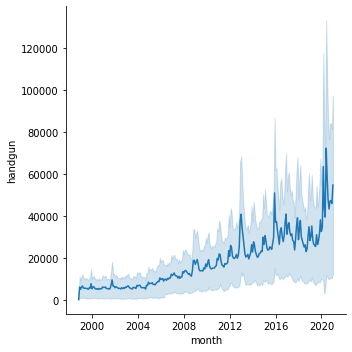

In [76]:
sns.relplot(x = "month", y = "handgun", kind = "line", data = newdata)

b)  Using Seaborn, create line plots (on the same graph) of the mean number of handgun background checks for each year for Florida and New York with a 95% confidence interval.  How does this plot differ from the one you made in part (a)?  Which state has the largest 95% confidence interval?  Does this make sense?

In [77]:
newdata2 = data[ny_filter | fl_filter]
newdata2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
9,2021-01-01,Florida,34470.0,0.0,97406.0,40173.0,6686.0,4549,2.0,6.0,8.0,0.0,4116.0,1251.0,7.0,1012.0,84.0,10.0,0.0,0.0,517.0,350.0,92.0,49.0,28.0,1.0,190817
34,2021-01-01,New York,3664.0,2108.0,12143.0,25221.0,4447.0,427,0.0,1.0,1.0,4.0,56.0,49.0,14.0,57.0,102.0,0.0,3.0,12.0,317.0,469.0,62.0,6.0,19.0,2.0,49184
64,2020-12-01,Florida,35227.0,0.0,81564.0,40115.0,5594.0,3733,1.0,16.0,5.0,0.0,3650.0,1022.0,10.0,987.0,95.0,21.0,0.0,0.0,400.0,333.0,94.0,38.0,42.0,1.0,172948
89,2020-12-01,New York,3261.0,1910.0,10486.0,24664.0,3145.0,367,0.0,1.0,0.0,2.0,38.0,56.0,8.0,63.0,128.0,1.0,0.0,10.0,265.0,399.0,52.0,2.0,11.0,1.0,44870
119,2020-11-01,Florida,35979.0,0.0,84366.0,40575.0,6090.0,4176,2.0,11.0,9.0,0.0,2984.0,944.0,7.0,848.0,78.0,17.0,0.0,0.0,483.0,273.0,79.0,36.0,27.0,3.0,176987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,1999-01-01,New York,4616.0,NaN,882.0,5327.0,NaN,11,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10897
14584,1998-12-01,Florida,0.0,NaN,11188.0,18840.0,NaN,337,1164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31529
14609,1998-12-01,New York,1068.0,NaN,1054.0,12234.0,NaN,12,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14417
14639,1998-11-01,Florida,0.0,NaN,319.0,443.0,NaN,10,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812


In [80]:
newdata3 = newdata2.mean()



### Question 3: Long gun bar chart

Use Seaborn to make a bar chart showing the number of long gun background checks for Florida and New York for each year.  Adjust the figure size and orientation of the axis labels so that the plot is readable.  How do the number of long gun background checks compare between Florida and New York?

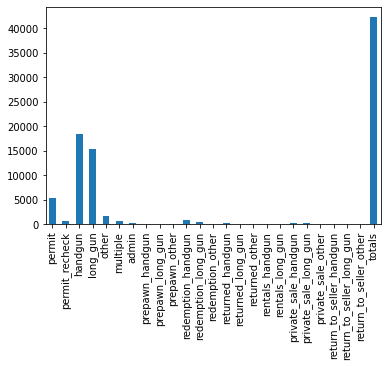

In [81]:
newdata3.plot.bar(x = "month", y = "longgun")



### Question 4: Box plot

Using Seaborn in a single plot, plot boxplots for both Florida and New York of the distribution of the number of long gun background checks made in each month.  That is, the x axis should be the months and the y axis should be the number of long gun background checks.  

Do Florida and New York follow the same monthly trends for nubmer of long gun background checks?  Where do they differ?

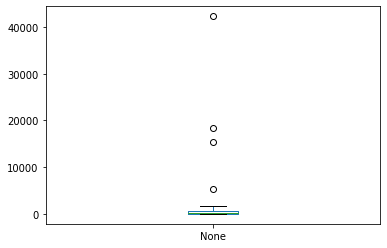

In [82]:
newdata3.plot.box(x = "month", y = "longgun")

### Question 5: Bivariate plot

Use Seaborn to plot a smoothed bivariate plot of the number of handgun background checks (x) vs. the number of long gun background checks for Florida.

How does this plot compare to the one for New York that we made in Section 5 of Lab 5?

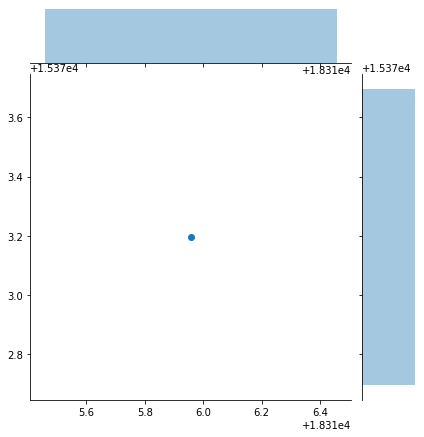

In [85]:
#newdata3.plot
sns.jointplot(x = "handgun", y = "long_gun", data = newdata3)

Note:  If you are using the latest version of Seaborn (which unfortunately is not the one on the Lehman 360 Jupyter Hub), you can use the parameter `hue` in the function `jointplot()` and plot the bivariate distributions for both Florida and New York on the same plot in different colors.

In [90]:
newdata3.plot.bivariate(x = "month", y = "longgun")

AttributeError: 'PlotAccessor' object has no attribute 'bivariate'